# CITS5508 Machine Learning  - Assignment 2
# Franco Meng 23370209

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from matplotlib import colormaps
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
data = load_breast_cancer()

In [3]:
feature = data.data

In [4]:
class_y = data.target

In [5]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [6]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [7]:
df = pd.DataFrame(feature, columns=data.feature_names)

In [8]:
df = df.sort_index(axis=1)
df

area error  compactness error  concave points error  concavity error  \
0        153.40            0.04904               0.01587          0.05373   
1         74.08            0.01308               0.01340          0.01860   
2         94.03            0.04006               0.02058          0.03832   
3         27.23            0.07458               0.01867          0.05661   
4         94.44            0.02461               0.01885          0.05688   
..          ...                ...                   ...              ...   
564      158.70            0.02891               0.02454          0.05198   
565       99.04            0.02423               0.01678          0.03950   
566       48.55            0.03731               0.01557          0.04730   
567       86.22            0.06158               0.01664          0.07117   
568       19.15            0.00466               0.00000          0.00000   

     fractal dimension error  mean area  mean compactness  \
0                   0.006193     1001.0           0.27760   
1                   0.003532     1326.0           0.07864   
2                   0.004571     1203.0           0.15990   
3                   0.009208      386.1           0.28390   
4                   0.005115     1297.0           0.13280   
..                       ...        ...               ...   
564                 0.004239     1479.0           0.11590   
565                 0.002498     1261.0           0.10340   
566                 0.003892      858.1           0.10230   
567                 0.006185     1265.0           0.27700   
568                 0.002783      181.0           0.04362   

     mean concave points  mean concavity  mean fractal dimension  ...  \
0                0.14710         0.30010                 0.07871  ...   
1                0.07017         0.08690                 0.05667  ...   
2                0.12790         0.19740                 0.05999  ...   
3                0.10520         0.24140                 0.09744  ...   
4                0.10430         0.19800                 0.05883  ...   
..                   ...             ...                     ...  ...   
564              0.13890         0.24390                 0.05623  ...   
565              0.09791         0.14400                 0.05533  ...   
566              0.05302         0.09251                 0.05648  ...   
567              0.15200         0.35140                 0.07016  ...   
568              0.00000         0.00000                 0.05884  ...   

     worst area  worst compactness  worst concave points  worst concavity  \
0        2019.0            0.66560                0.2654           0.7119   
1        1956.0            0.18660                0.1860           0.2416   
2        1709.0            0.42450                0.2430           0.4504   
3         567.7            0.86630                0.2575           0.6869   
4        1575.0            0.20500                0.1625           0.4000   
..          ...                ...                   ...              ...   
564      2027.0            0.21130                0.2216           0.4107   
565      1731.0            0.19220                0.1628           0.3215   
566      1124.0            0.30940                0.1418           0.3403   
567      1821.0            0.86810                0.2650           0.9387   
568       268.6            0.06444                0.0000           0.0000   

     worst fractal dimension  worst perimeter  worst radius  worst smoothness  \
0                    0.11890           184.60        25.380           0.16220   
1                    0.08902           158.80        24.990           0.12380   
2                    0.08758           152.50        23.570           0.14440   
3                    0.17300            98.87        14.910           0.20980   
4                    0.07678           152.20        22.540           0.13740   
..                       ...              ...           ...

# D1

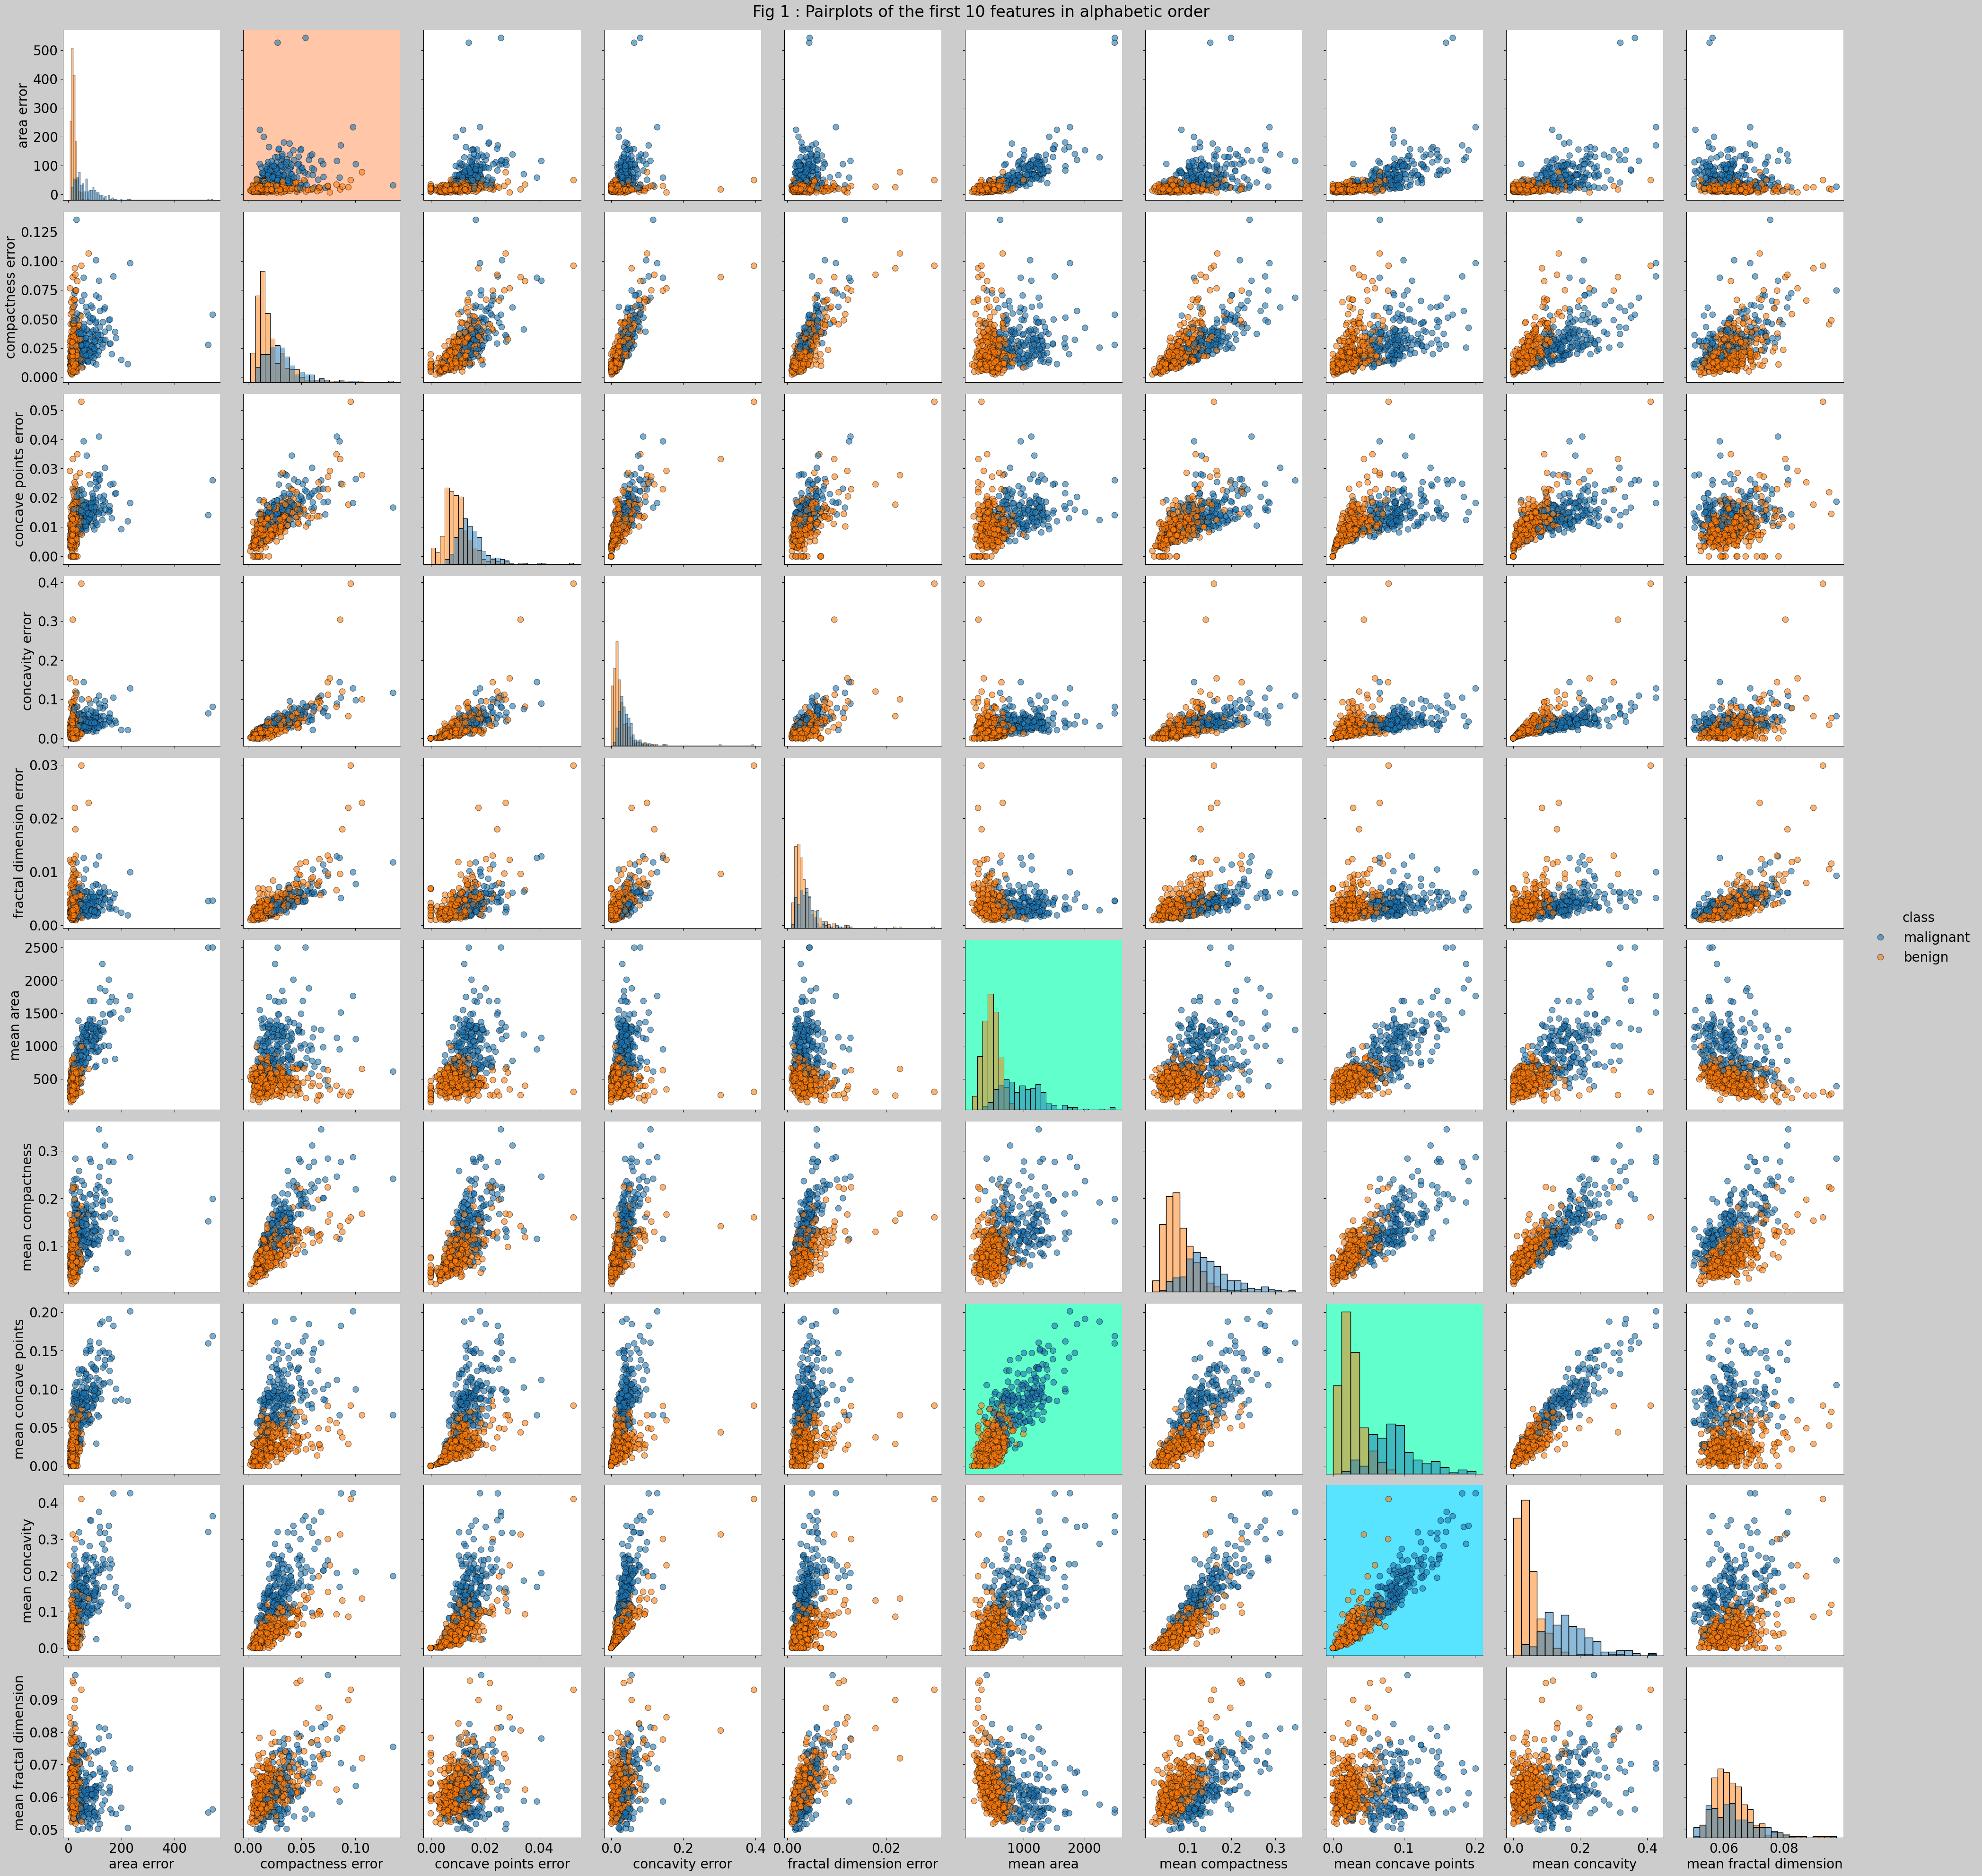

In [9]:
pd.options.mode.chained_assignment = None
matplotlib.rcParams['font.size'] = 20
df_plot = df.iloc[:, :10]
df_plot['class'] = data.target.tolist()
class_name = {0: 'malignant', 1: 'benign'}
df_plot['class'] =  df_plot['class'].replace(class_name)
figure_1 = sns.pairplot(df_plot,hue = 'class', plot_kws = { 'alpha': 0.6, 's': 80, 'edgecolor': 'k'}, diag_kind = 'hist', height = 4)
for i, ax in enumerate(figure_1.axes.flat):
    if i == 87:  
        ax.set_facecolor('#58E3FF')
    elif i == 1 :
        ax.set_facecolor('#FFC6A7')
    elif i in (55,75,77):
        ax.set_facecolor('#61FFCB')
figure_1.fig.suptitle (t = "Fig 1 : Pairplots of the first 10 features in alphabetic order", y = 1.0 )
figure_1.fig.patch.set_facecolor('#CDCCCD') 
#figure_1.axes[0,0].set_ylabel('x')
plt.savefig('Fig 1.png', bbox_inches='tight')
plt.show()


# D2 : 

1. There are some highly correlated features, when the certain pair plots looks like a narrow diagonal line, for example, the blue cell of the plots showing a strong correlation between mean concave point with mean concavity.

2. The presence of clustered groups are evident, the green cell shows malignant class (red scatters) appears having greater measurements in both 'mean area' and 'mean concave points'.  It can also be seen from the histogram of these corresponding features, where malignant class (the red bars) are mostly on the right hand side of benign class (the blue bars)

3. Yes, for example , the orange cell showing a couple of possible outlier in feature area error may existed in maligant class instances, where majority of area error is under 200, but these possible outlier are over 500.

4. Maybe highly correlated features could be removed, e.g. the blue cell, we may keep one of the feature (concave point or mean concavity), as these feature may serve very similar functionality in the decision tree slitting.
   However, due to the nature of the decision tree algorithm, it will perform feature selection during the training process, as calculating the metrics like Gini impurity or information gain by considering each feature individually, if two feature (highly correlated) providing same effectiveness of loss reduction, the algorithm would use either feature (depends on random state seed).
   Removing feature may still speed up the computational time tho, but overall it is not very crucial that we have to deal with multicollinearity issue in data preparation stage, unlike some linear regression models.

# D3: 

In [10]:
df_plot_no_class = df.iloc[:, :10]

<Figure size 1600x1200 with 0 Axes>

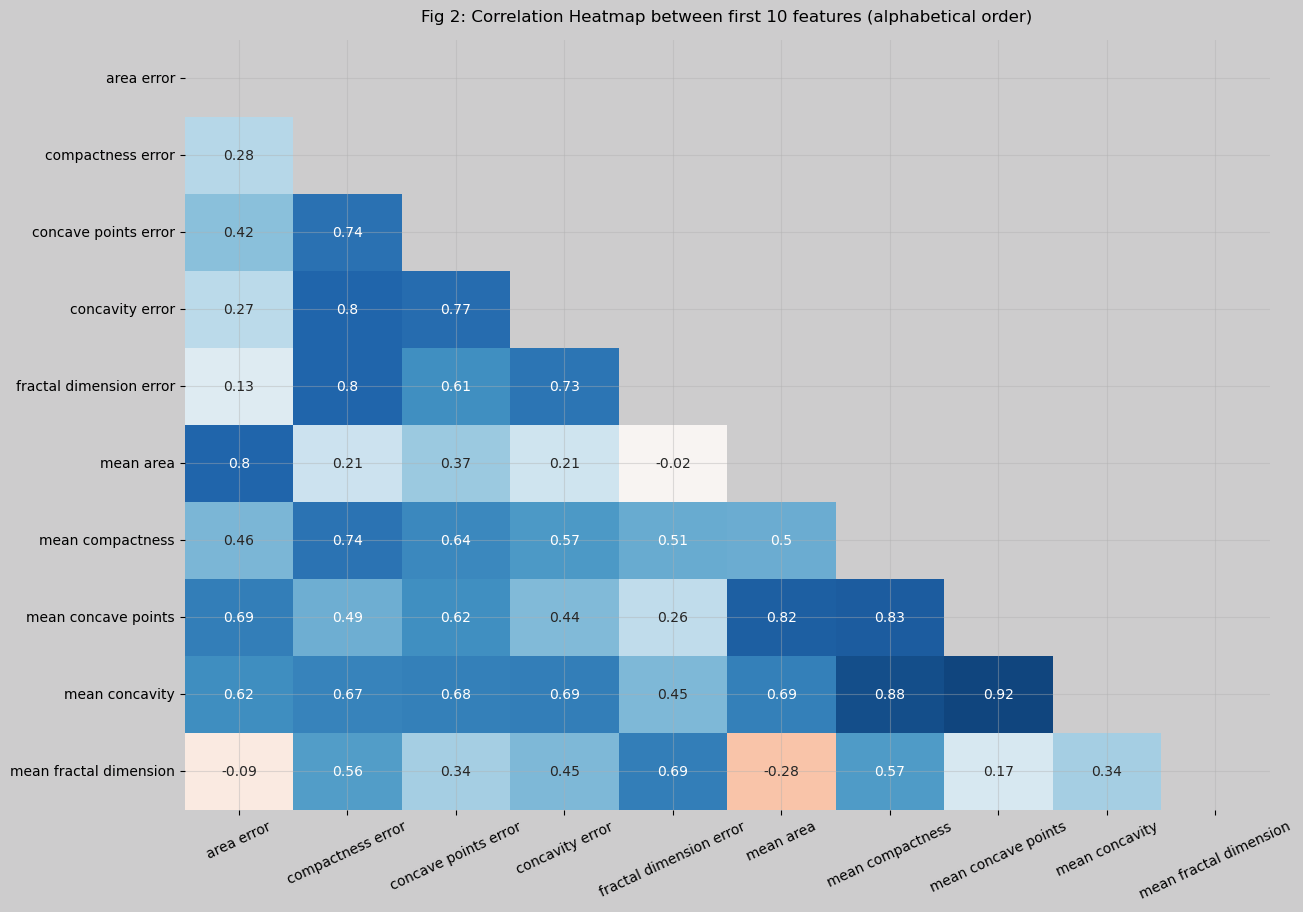

In [11]:
matplotlib.rcParams['font.size'] = 10
plt.figure(figsize=(16, 12))
fig, ax = plt.subplots(figsize=(14, 10))
mask = np.triu(np.ones_like(df_plot_no_class.corr(), dtype=bool))
heatmap = sns.heatmap(df_plot_no_class.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='RdBu',cbar=False)
heatmap.set_title('Fig 2: Correlation Heatmap between first 10 features (alphabetical order)', fontdict={'fontsize':12}, pad=13)
ax.set_facecolor('#CDCCCD')
ax.grid(visible=True, which='major', axis='both', alpha = 0.4)
plt.xticks(rotation=25) 
fig.set_facecolor('#CDCCCD')
plt.savefig('Fig 2.png', bbox_inches='tight')

# D4: 
 The correlation coefficients support my previous observatioins, where the feature mean concave points and mean concavity has the highest correlation of 0.92. 

In [12]:
df = df.drop(columns=['mean perimeter', 'mean radius','worst radius','worst perimeter','radius error'])
df


area error  compactness error  concave points error  concavity error  \
0        153.40            0.04904               0.01587          0.05373   
1         74.08            0.01308               0.01340          0.01860   
2         94.03            0.04006               0.02058          0.03832   
3         27.23            0.07458               0.01867          0.05661   
4         94.44            0.02461               0.01885          0.05688   
..          ...                ...                   ...              ...   
564      158.70            0.02891               0.02454          0.05198   
565       99.04            0.02423               0.01678          0.03950   
566       48.55            0.03731               0.01557          0.04730   
567       86.22            0.06158               0.01664          0.07117   
568       19.15            0.00466               0.00000          0.00000   

     fractal dimension error  mean area  mean compactness  \
0                   0.006193     1001.0           0.27760   
1                   0.003532     1326.0           0.07864   
2                   0.004571     1203.0           0.15990   
3                   0.009208      386.1           0.28390   
4                   0.005115     1297.0           0.13280   
..                       ...        ...               ...   
564                 0.004239     1479.0           0.11590   
565                 0.002498     1261.0           0.10340   
566                 0.003892      858.1           0.10230   
567                 0.006185     1265.0           0.27700   
568                 0.002783      181.0           0.04362   

     mean concave points  mean concavity  mean fractal dimension  ...  \
0                0.14710         0.30010                 0.07871  ...   
1                0.07017         0.08690                 0.05667  ...   
2                0.12790         0.19740                 0.05999  ...   
3                0.10520         0.24140                 0.09744  ...   
4                0.10430         0.19800                 0.05883  ...   
..                   ...             ...                     ...  ...   
564              0.13890         0.24390                 0.05623  ...   
565              0.09791         0.14400                 0.05533  ...   
566              0.05302         0.09251                 0.05648  ...   
567              0.15200         0.35140                 0.07016  ...   
568              0.00000         0.00000                 0.05884  ...   

     symmetry error  texture error  worst area  worst compactness  \
0           0.03003         0.9053      2019.0            0.66560   
1           0.01389         0.7339      1956.0            0.18660   
2           0.02250         0.7869      1709.0            0.42450   
3           0.05963         1.1560       567.7            0.86630   
4           0.01756         0.7813      1575.0            0.20500   
..              ...            ...         ...                ...   
564         0.01114         1.2560      2027.0            0.21130   
565         0.01898         2.4630      1731.0            0.19220   
566         0.01318         1.0750      1124.0            0.30940   
567         0.02324         1.5950      1821.0            0.86810   
568         0.02676         1.4280       268.6            0.06444   

     worst concave points  worst concavity  worst fractal dimension  \
0                  0.2654           0.7119                  0.11890   
1                  0.1860           0.2416                  0.08902   
2                  0.2430           0.4504                  0.08758   
3                  0.2575           0.6869                  0.17300   
4                  0.1625           0.4000                  0.07678   
..                    ...              ...                      ...   
564                0.2216           0.4107                  0.07115   
565                0.1628           0.3215                  0.06637   
56

In [13]:
df.columns.to_numpy()

array(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean smoothness', 'mean symmetry',
       'mean texture', 'perimeter error', 'smoothness error',
       'symmetry error', 'texture error', 'worst area',
       'worst compactness', 'worst concave points', 'worst concavity',
       'worst fractal dimension', 'worst smoothness', 'worst symmetry',
       'worst texture'], dtype=object)

# D6 
decision tree is not sensitive to normalisation and scaling , then here use the orginal data 

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    df.to_numpy(), class_y, test_size=0.2, random_state=5508
)

In [15]:
clf = DecisionTreeClassifier(random_state=5508)

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5508)

In [17]:
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

In [18]:
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)
train_recall = recall_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)
test_recall = recall_score(y_test, y_test_pred)


conf_matrix_0 = confusion_matrix(y_test, y_test_pred)
print("Training Set:")
print(f"Accuracy: {train_accuracy:.2f}")
print(f"Precision: {train_precision:.2f}")
print(f"Recall: {train_recall:.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")

print("\nConfusion Matrix:")
print(conf_matrix_0)

Training Set:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00

Test Set:
Accuracy: 0.96
Precision: 0.97
Recall: 0.97

Confusion Matrix:
[[39  2]
 [ 2 71]]


In [19]:
def cm_labels(LR):
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in LR.flatten()]
    #group_percentages = ['{0:.2%}'.format(value) for value in LR.flatten()/np.sum(LR)]
    labels = [f'{v2}: {v1}' for v1, v2 in zip(group_counts,group_names)]
    labels = np.asarray(labels).reshape(2,2)
    return labels

In [20]:
label_0 = cm_labels(conf_matrix_0)

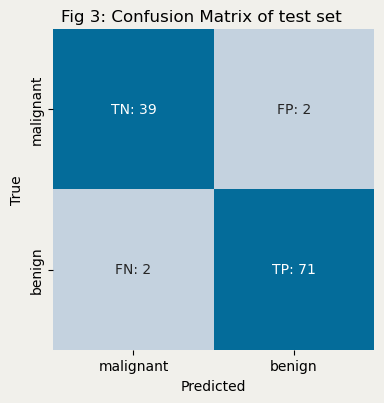

In [21]:
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_0, annot=label_0, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 3: Confusion Matrix of test set')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 3.png', bbox_inches='tight')
plt.show()

# D7:
From the accuracy, precision and recall measurement, along with the confusion matrix, we can see that the decision tree perform well.
However the claissfier is definitely overfitting, as it reaches maxmim 1 for all the matrix, this means the bias is extremely low or zero, however this would lead to high variance.


# D8:

In [22]:
export_graphviz(
    clf,
    out_file = 'tree.dot',
    feature_names = df.columns.to_numpy(),
    class_names=['malignant','benign'],
    rounded = True,
    filled = True)

In [23]:
src = Source.from_file('tree.dot')
src.render('Fig 4', format='png', cleanup=True)

'Fig 4.png'

# D9:

1. From the decision tree visualisation we can see there are 8 levels/depth in the tree.
2. The diagram can confirm the overfitting issue, where all the terminal nodes are pure, also there are instances where after the final split, the left and right terminal nodes combined sample size is only 3. These are obvious indicators that the model is overfitted.
3. Again, we can see all the leaves are pure, some leave has 288 samples with same class maybe quite a good split, but some leaves having very low sample size within, indicated the overfit issues.
4. As decision tree is a white box algorithm, therefore it can be interpretated clearly. We can use the spliting rules to explain what feature was used for the each split, as well as the threshold.
   If there is a new instances ,we could easily use the visualisation to work out which class it predicted to be. 

# D10: 

In [24]:
## repeat another 4 split 

In [25]:
ra_st_list = []
accuracy_list = []
precision_list = []
recall_list = []
for ra_st in [5508,5509,5510,5511,5512]:
    X_train, X_test, y_train, y_test = train_test_split(
        df.to_numpy(), class_y, test_size=0.2, random_state=ra_st)
    clf = DecisionTreeClassifier(random_state=5508)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    ra_st_list.append(ra_st)
    accuracy_list.append(test_accuracy)
    precision_list.append(test_precision)
    recall_list.append(test_recall)


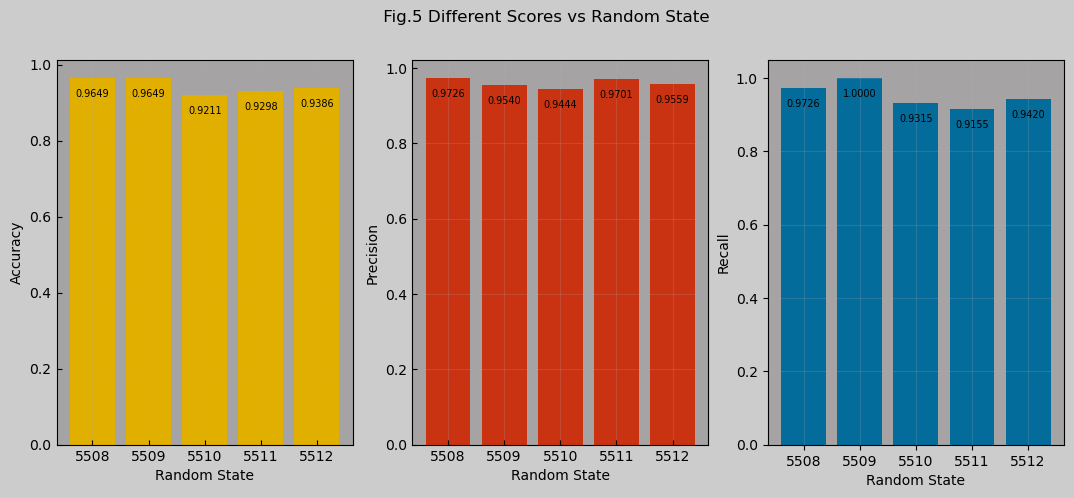

In [26]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(13, 5))
bar_container_1 = ax1.bar(ra_st_list, accuracy_list, label='Training Cost',alpha=1, color = '#E1AF00')
bar_container_2 = ax2.bar(ra_st_list, precision_list, label='Training Cost',alpha=1, color = '#C93312')
bar_container_3 = ax3.bar(ra_st_list, recall_list, label='Training Cost',alpha=1, color = '#046C9A')
ax1.bar_label(bar_container_1, fmt='{:.4f}', size = 7,padding=-15)
# ax1.title.set_text('Accuracy vs Random State')
ax1.set_facecolor('#A5A3A3')
ax1.tick_params(labelsize=10,direction='in')
#ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
# ax2.title.set_text('Precision vs Random State')
# ax1.title.set_fontsize(10)
# ax2.title.set_fontsize(10)
# ax3.title.set_fontsize(10)
ax2.set_facecolor('#A5A3A3')
ax2.tick_params(labelsize=10,direction='in')
# ax3.title.set_text('Recall vs Random State')
ax3.set_facecolor('#A5A3A3')
ax2.bar_label(bar_container_2, fmt='{:.4f}', size = 7,padding=-15)
ax3.bar_label(bar_container_3, fmt='{:.4f}', size = 7,padding=-15)
ax1.grid(visible=True, which='major', axis='both', alpha = 0.2)
ax2.grid(visible=True, which='major', axis='both', alpha = 0.2)
ax3.grid(visible=True, which='major', axis='both', alpha = 0.2)
#ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax1.set_ylabel('Accuracy', size = 10)
ax2.set_ylabel('Precision', size = 10)
ax3.set_ylabel('Recall', size = 10)
ax1.set_xlabel('Random State', size = 10)
ax2.set_xlabel('Random State', size = 10)
ax3.set_xlabel('Random State', size = 10)
ax1.xaxis.label.set_color('black')
ax2.xaxis.label.set_color('black')
ax3.xaxis.label.set_color('black')
ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')
ax3.yaxis.label.set_color('black')
# ax1.set_ylabel('Cost')
# ax2.set_xlabel('Iterations')
# ax2.set_ylabel('Fraction of Misclassification')
fig.set_facecolor('#CDCCCD')
#plt.figtext(0.88, 0.01, " Figure 4 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
# plt.savefig('Fig 4.png', bbox_inches='tight')
fig.suptitle(' Fig.5 Different Scores vs Random State')
plt.savefig('Fig 5.png', bbox_inches='tight')
plt.show()


# D11

In [27]:
test_perc_list = []
accuracy_list_2 = []
precision_list_2 = []
recall_list_2 = []
for test_perc in [0.5,0.4,0.3,0.2,0.1]:
    X_train, X_test, y_train, y_test = train_test_split(
        df.to_numpy(), class_y, test_size=test_perc, random_state=5508)
    clf = DecisionTreeClassifier(random_state=5508)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_perc_list.append(test_perc)
    accuracy_list_2.append(test_accuracy)
    precision_list_2.append(test_precision)
    recall_list_2.append(test_recall)


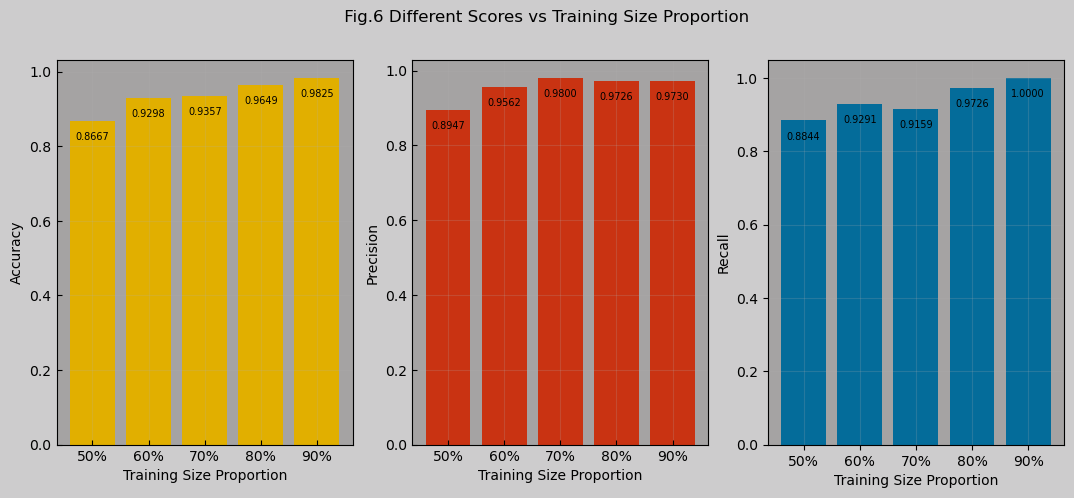

In [28]:
train_prec_list = ['50%','60%','70%','80%','90%']
fig, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(13, 5))
bar_container_1 = ax1.bar(train_prec_list, accuracy_list_2, label='Training Cost',alpha=1, color = '#E1AF00')
bar_container_2 = ax2.bar(train_prec_list, precision_list_2, label='Training Cost',alpha=1, color = '#C93312')
bar_container_3 = ax3.bar(train_prec_list, recall_list_2, label='Training Cost',alpha=1, color = '#046C9A')
#ax1.title.set_text('Accuracy vs Random State')
ax1.set_facecolor('#A5A3A3')
ax1.tick_params(labelsize=10,direction='in')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.2)
ax2.grid(visible=True, which='major', axis='both', alpha = 0.2)
ax3.grid(visible=True, which='major', axis='both', alpha = 0.2)
#ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
#ax2.title.set_text('Precision vs Random State')
ax2.set_facecolor('#A5A3A3')
ax2.tick_params(labelsize=10,direction='in')
#ax3.title.set_text('Recall vs Random State')
ax3.set_facecolor('#A5A3A3')
ax1.set_xlabel('Training Size Proportion', size = 10)
ax2.set_xlabel('Training Size Proportion', size = 10)
ax3.set_xlabel('Training Size Proportion', size = 10)
ax1.xaxis.label.set_color('black')
ax2.xaxis.label.set_color('black')
ax3.xaxis.label.set_color('black')
ax1.set_ylabel('Accuracy', size = 10)
ax2.set_ylabel('Precision', size = 10)
ax3.set_ylabel('Recall', size = 10)
ax1.yaxis.label.set_color('black')
ax2.yaxis.label.set_color('black')
ax3.yaxis.label.set_color('black')
ax1.bar_label(bar_container_1, fmt='{:.4f}', size = 7,padding=-15)
ax2.bar_label(bar_container_2, fmt='{:.4f}', size = 7,padding=-15)
ax3.bar_label(bar_container_3, fmt='{:.4f}', size = 7,padding=-15)
#ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
fig.set_facecolor('#CDCCCD')
fig.suptitle(' Fig.6 Different Scores vs Training Size Proportion')
plt.savefig('Fig 6.png', bbox_inches='tight')
#plt.figtext(0.88, 0.01, " Figure 4 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
# plt.savefig('Fig 4.png', bbox_inches='tight')
plt.show()

# D12

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    df.to_numpy(), class_y, test_size=0.2, random_state=5508
)

In [30]:
X_train.shape

(455, 25)

In [31]:
X_test.shape

(114, 25)

In [32]:
#hyper_parameter_part

In [33]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf_1 = DecisionTreeClassifier(random_state=5508)
grid_search_1 = GridSearchCV(clf_1, param_grid, cv=skf, scoring='accuracy')
grid_search_1.fit(X_train, y_train)
print("Best Parameters:", grid_search_1.best_params_)
print("Best Accuracy Score:", grid_search_1.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Accuracy Score: 0.9385024154589372


In [41]:
grid_search_1.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.

In [42]:
clf_best_accuracy.predict_proba(X_test)

array([[1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.66666667, 0.33333333],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [1.        , 0.        ],
       [0.01879699, 0.98120301],
       [0.

In [34]:
clf_best_accuracy = DecisionTreeClassifier(random_state=5508, max_depth = 3, min_samples_leaf = 2, min_samples_split = 2)

In [35]:
clf_best_accuracy.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2, random_state=5508)

In [36]:
y_train_pred_1 = clf_best_accuracy.predict(X_train)
y_test_pred_1 = clf_best_accuracy.predict(X_test)

In [37]:
train_accuracy_1 = accuracy_score(y_train, y_train_pred_1)
train_precision_1 = precision_score(y_train, y_train_pred_1)
train_recall_1 = recall_score(y_train, y_train_pred_1)

test_accuracy_1 = accuracy_score(y_test, y_test_pred_1)
test_precision_1 = precision_score(y_test, y_test_pred_1)
test_recall_1 = recall_score(y_test, y_test_pred_1)


conf_matrix_1 = confusion_matrix(y_test, y_test_pred_1)
print("Training Set:")
print(f"Accuracy: {train_accuracy_1:.2f}")
print(f"Precision: {train_precision_1:.2f}")
print(f"Recall: {train_recall_1:.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_1:.2f}")
print(f"Precision: {test_precision_1:.2f}")
print(f"Recall: {test_recall_1:.2f}")

conf_matrix_1

Training Set:
Accuracy: 0.96
Precision: 0.95
Recall: 0.99

Test Set:
Accuracy: 0.94
Precision: 0.96
Recall: 0.95


array([[38,  3],
       [ 4, 69]], dtype=int64)

In [525]:
label_1 = cm_labels(conf_matrix_1)

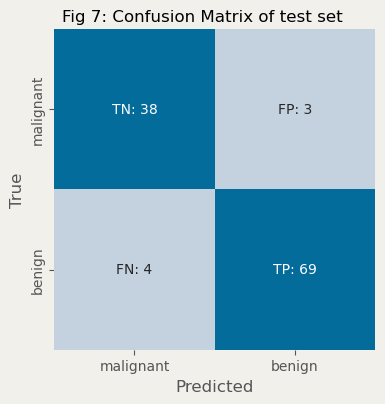

In [526]:
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_1, annot=label_1, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 7: Confusion Matrix of test set')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 7.png', bbox_inches='tight')
plt.show()

# D13 :
It is interesting to see the FP and FN both have increased comparing with D6, without fine tuning hyper parameters.
However as Fine tuning process using all the combination of the hyperparameters candidates, along with the cross validation to result in a overall better model.
simply by comparing the result, there are only 1 or 2 increase in the misclassfication, however this doesn't mean the model has not been improved. 
This new model with optimal hyperparameter most likely will generalise better with other new and bigger testing size. With 3 being the max_depth, it is definitely more prefered comparing the depth of 8 in D6 overfitted model . 

# D14

### Using Precision as Scoring

In [527]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf_2 = DecisionTreeClassifier(random_state=5508)
grid_search_2 = GridSearchCV(clf_2, param_grid, cv=skf, scoring='precision')
grid_search_2.fit(X_train, y_train)
print("Best Parameters:", grid_search_2.best_params_)
print("Best Precision Score:", grid_search_2.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Precision Score: 0.9550794680744625


In [528]:
clf_best_precision = DecisionTreeClassifier(random_state=5508, max_depth = 4, min_samples_leaf = 2, min_samples_split = 2)

In [529]:
clf_best_precision.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, random_state=5508)

In [530]:
y_train_pred_2 = clf_best_precision.predict(X_train)
y_test_pred_2 = clf_best_precision.predict(X_test)

In [531]:
train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)
train_precision_2 = precision_score(y_train, y_train_pred_2)
train_recall_2 = recall_score(y_train, y_train_pred_2)

test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)
test_precision_2 = precision_score(y_test, y_test_pred_2)
test_recall_2 = recall_score(y_test, y_test_pred_2)


conf_matrix_2 = confusion_matrix(y_test, y_test_pred_2)
print("Training Set:")
print(f"Accuracy: {train_accuracy_2:.2f}")
print(f"Precision: {train_precision_2:.2f}")
print(f"Recall: {train_recall_2:.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_2:.2f}")
print(f"Precision: {test_precision_2:.2f}")
print(f"Recall: {test_recall_2:.2f}")

conf_matrix_2

Training Set:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99

Test Set:
Accuracy: 0.95
Precision: 0.97
Recall: 0.95


array([[39,  2],
       [ 4, 69]], dtype=int64)

In [532]:
label_2 = cm_labels(conf_matrix_2)

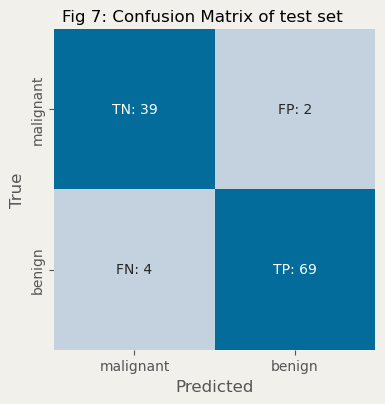

In [533]:
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_2, annot=label_2, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 7: Confusion Matrix of test set')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
#plt.savefig('Fig 8.png', bbox_inches='tight')
plt.show()

### Using Recll as Scoring

In [535]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
clf_2 = DecisionTreeClassifier(random_state=5508)
grid_search_2 = GridSearchCV(clf_2, param_grid, cv=skf, scoring='recall')
grid_search_2.fit(X_train, y_train)
print("Best Parameters:", grid_search_2.best_params_)
print("Best recall Score:", grid_search_2.best_score_)

Best Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best recall Score: 0.9716748768472907


In [536]:
clf_best_recall = DecisionTreeClassifier(random_state=5508, max_depth = 3, min_samples_leaf = 5, min_samples_split = 2)

In [537]:
clf_best_recall.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=5508)

In [538]:
y_train_pred_3 = clf_best_recall.predict(X_train)
y_test_pred_3 = clf_best_recall.predict(X_test)

In [539]:
train_accuracy_3 = accuracy_score(y_train, y_train_pred_3)
train_precision_3 = precision_score(y_train, y_train_pred_3)
train_recall_3 = recall_score(y_train, y_train_pred_3)

test_accuracy_3 = accuracy_score(y_test, y_test_pred_3)
test_precision_3 = precision_score(y_test, y_test_pred_3)
test_recall_3 = recall_score(y_test, y_test_pred_3)


conf_matrix_3 = confusion_matrix(y_test, y_test_pred_3)
print("Training Set:")
print(f"Accuracy: {train_accuracy_3:.2f}")
print(f"Precision: {train_precision_3:.2f}")
print(f"Recall: {train_recall_3:.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_3:.2f}")
print(f"Precision: {test_precision_3:.2f}")
print(f"Recall: {test_recall_3:.2f}")

conf_matrix_3

Training Set:
Accuracy: 0.96
Precision: 0.96
Recall: 0.98

Test Set:
Accuracy: 0.94
Precision: 0.96
Recall: 0.95


array([[38,  3],
       [ 4, 69]], dtype=int64)

In [540]:
label_3 = cm_labels(conf_matrix_3)

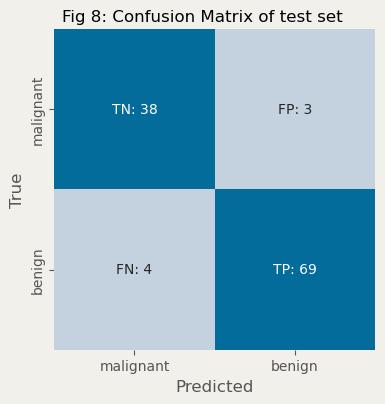

In [541]:
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_3, annot=label_3, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 8: Confusion Matrix of test set')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
#plt.savefig('Fig 8.png', bbox_inches='tight')
plt.show()

### Producing all the plots for comparison

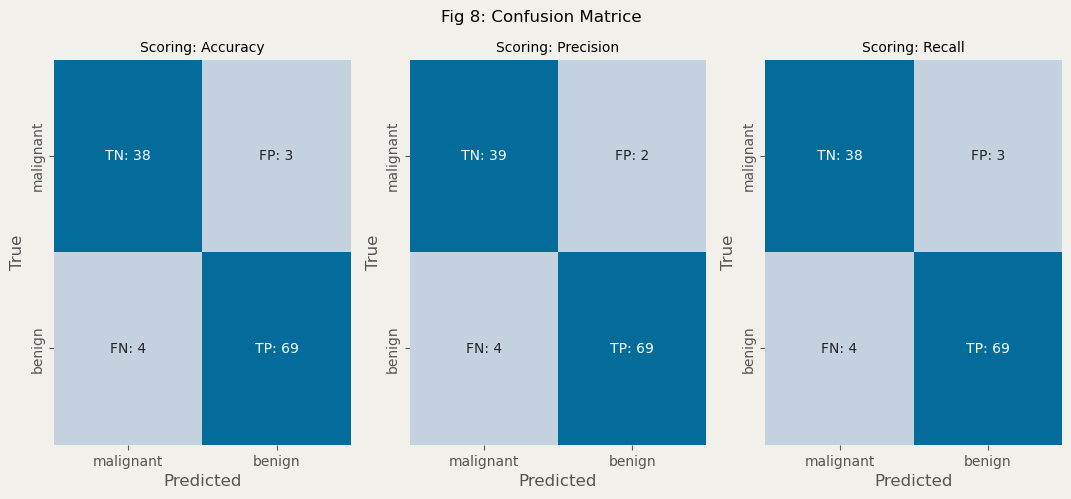

In [542]:
fig, ax = plt.subplots(1, 3,figsize=(13, 5))
g1 = sns.heatmap(conf_matrix_1, annot=label_1, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False, ax=ax[0])
g1.xaxis.set_ticklabels(['malignant', 'benign'])
g1.yaxis.set_ticklabels(['malignant', 'benign'])
g2 = sns.heatmap(conf_matrix_2, annot=label_2, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False, ax=ax[1])
g2.xaxis.set_ticklabels(['malignant', 'benign'])
g2.yaxis.set_ticklabels(['malignant', 'benign'])
g3 = sns.heatmap(conf_matrix_3, annot=label_3, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False, ax=ax[2])
g3.xaxis.set_ticklabels(['malignant', 'benign'])
g3.yaxis.set_ticklabels(['malignant', 'benign'])
ax[0].set_title('Scoring: Accuracy')
ax[1].set_title('Scoring: Precision')
ax[2].set_title('Scoring: Recall')
ax[0].title.set_fontsize(10)
ax[1].title.set_fontsize(10)
ax[2].title.set_fontsize(10)
#fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 8: Confusion Matrice')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 8.png', bbox_inches='tight')
plt.show()

# Comment:

Overall, with different scoring options, we can see the regardless which scoring option we use, the model struggle to lower the false negative . 
However the using Precision as scoring method, the false positive rate has been lowered as expected.
There maybe some outlier in the test sample feature space in malignant class, where the model constanctly incorrectly predicted into Benign class.
It may be worth to use export_graphviz function again, to visualise the new model with optimal hyperparameters. To see which instances in the testing data constantly being mistakenly classified as benign where in fact they were malignant class. These 4 misclassification instances may not be the same for all three model though. 

In [275]:
# export_graphviz(
#     clf_best_recall,
#     out_file = 'tree_recall.dot',
#     feature_names = df.columns.to_numpy(),
#     class_names=['malignant','benign'],
#     rounded = True,
#     filled = True)

In [276]:
# src = Source.from_file('tree_recall.dot')
# src.render('tree_recall', format='png', cleanup=True)

'tree_recall.png'

# D15

In [543]:
clf_best_accuracy.feature_importances_.reshape(1,25)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.01946905, 0.        , 0.01271707, 0.00345628, 0.        ,
        0.        , 0.        , 0.80154243, 0.        , 0.15104012,
        0.        , 0.        , 0.        , 0.        , 0.01177506]])

In [544]:
grid_search_1.best_estimator_.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01946905, 0.        , 0.01271707, 0.00345628, 0.        ,
       0.        , 0.        , 0.80154243, 0.        , 0.15104012,
       0.        , 0.        , 0.        , 0.        , 0.01177506])

In [545]:
feat_importances = pd.DataFrame(clf_best_accuracy.feature_importances_, index=df.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace=True)


In [546]:
impor_x = clf_best_accuracy.feature_importances_

In [547]:
impor_y = np.array(df.columns.tolist())

In [548]:
impor_x,impor_y = zip( *sorted( zip(impor_x,impor_y) , reverse = True) )

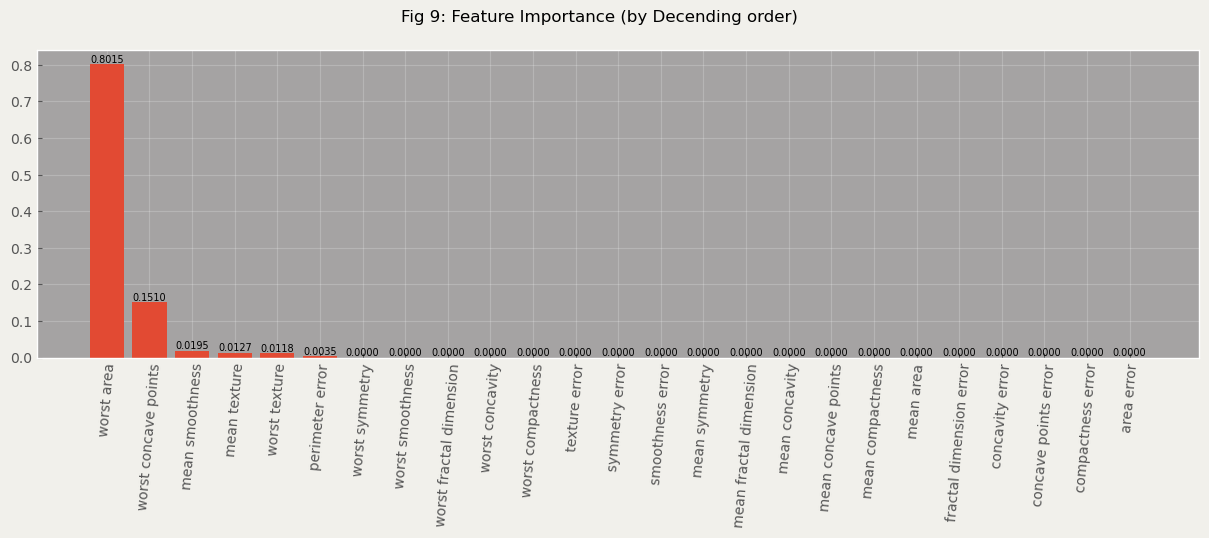

In [549]:
fig, ax = plt.subplots(figsize=(15,4))
# feat_importances.iloc[:10,:].plot( ax= ax, kind = 'bar' , color = '#C93312' )
bar_container_1 = ax.bar( x=impor_y, height=impor_x)
ax.bar_label(bar_container_1, fmt='{:.4f}', size = 7)
plt.xticks(rotation=85) 
ax.set_facecolor('#A5A3A3')
ax.tick_params(labelsize=10,direction='in')
ax.grid(visible=True, which='major', axis='both', alpha = 0.2)
fig.suptitle('Fig 9: Feature Importance (by Decending order)')
plt.savefig('Fig 9.png', bbox_inches='tight')
fig.set_facecolor('#f1f0eb')

# D16

In [551]:
df.columns [~selector.get_support()]

Index(['area error', 'compactness error', 'concave points error',
       'concavity error', 'fractal dimension error', 'mean area',
       'mean compactness', 'mean concave points', 'mean concavity',
       'mean fractal dimension', 'mean symmetry', 'perimeter error',
       'smoothness error', 'symmetry error', 'texture error',
       'worst compactness', 'worst concavity', 'worst fractal dimension',
       'worst smoothness', 'worst symmetry'],
      dtype='object')

In [552]:
selector = SelectFromModel(estimator=DecisionTreeClassifier(random_state=5508, max_depth = 3, min_samples_leaf = 2, min_samples_split = 2),threshold=0.01).fit(X_train, y_train)
selector.get_support()

array([False, False, False, False, False, False, False, False, False,
       False,  True, False,  True, False, False, False, False,  True,
       False,  True, False, False, False, False,  True])

In [553]:
selector.threshold_

0.01

In [554]:
X_train_reduced = selector.transform(X_train) #after dropped all the features - training
X_test_reduced = selector.transform(X_test) #after dropped all the features - testing

In [555]:
# selector = SelectFromModel(estimator=DecisionTreeClassifier(random_state=5508, max_depth=2, min_samples_leaf=5, min_samples_split=2),threshold=0.01).fit(X_train, y_train)
# selector.get_support()
# X_train_reduced = selector.transform(X_train) #after dropped all the features - training
# X_test_reduced = selector.transform(X_test) #after dropped all the features - testing

In [556]:
clf_best_accuracy.feature_importances_[selector.get_support()]  #use result of get_support as mask to filter features.

array([0.01946905, 0.01271707, 0.80154243, 0.15104012, 0.01177506])

### retrain the model : 

In [557]:
# Define the parameter grid
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_split': [2, 4, 5, 10],
    'min_samples_leaf': [2, 5]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf_2 = DecisionTreeClassifier(random_state=5508)


grid_search_2 = GridSearchCV(clf_2, param_grid, cv=skf, scoring='accuracy')


grid_search_2.fit(X_train_reduced, y_train)


print("Best Parameters:", grid_search_2.best_params_)
print("Best Accuracy Score:", grid_search_2.best_score_)

Best Parameters: {'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Accuracy Score: 0.9516908212560387


In [558]:
np.sum(grid_search_2.best_estimator_.feature_importances_)  #after dimension drop

1.0000000000000002

# D17

In [559]:
reduce_optimal_clf =  DecisionTreeClassifier(random_state=5508,max_depth = 4, min_samples_leaf = 2, min_samples_split = 5)

In [560]:
reduce_optimal_clf.fit(X_train_reduced, y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=2, min_samples_split=5,
                       random_state=5508)

In [561]:
y_train_pred_reduce = reduce_optimal_clf.predict(X_train_reduced)
y_test_pred_reduce = reduce_optimal_clf.predict(X_test_reduced)

In [562]:
train_accuracy_reduce  = accuracy_score(y_train, y_train_pred_reduce)
train_precision_reduce  = precision_score(y_train, y_train_pred_reduce)
train_recall_reduce  = recall_score(y_train,y_train_pred_reduce)

test_accuracy_reduce  = accuracy_score(y_test, y_test_pred_reduce)
test_precision_reduce  = precision_score(y_test, y_test_pred_reduce)
test_recall_reduce  = recall_score(y_test, y_test_pred_reduce)


conf_matrix_reduce  = confusion_matrix(y_test, y_test_pred_reduce)
print("Training Set:")
print(f"Accuracy: {train_accuracy_reduce :.2f}")
print(f"Precision: {train_precision_reduce :.2f}")
print(f"Recall: {train_recall_reduce :.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_reduce :.2f}")
print(f"Precision: {test_precision_reduce :.2f}")
print(f"Recall: {test_recall_reduce :.2f}")
conf_matrix_reduce

Training Set:
Accuracy: 0.98
Precision: 0.97
Recall: 0.99

Test Set:
Accuracy: 0.95
Precision: 0.97
Recall: 0.95


array([[39,  2],
       [ 4, 69]], dtype=int64)

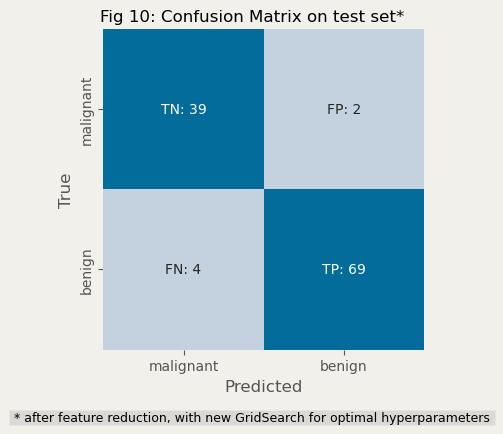

In [563]:
label_reduce = cm_labels(conf_matrix_reduce)
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_reduce, annot=label_reduce, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 10: Confusion Matrix on test set*')
plt.figtext(0.5, -0.05, " * after feature reduction, with new GridSearch for optimal hyperparameters ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.2, "pad":1})
plt.savefig('Fig 10.png', bbox_inches='tight')
plt.show()

In [419]:
# y_train_pred_2 = grid_search_2.predict(X_train_reduced)
# y_test_pred_2 = grid_search_2.predict(X_test_reduced)

In [434]:
# train_accuracy_2 = accuracy_score(y_train, y_train_pred_2)
# train_precision_2 = precision_score(y_train, y_train_pred_2)
# train_recall_2 = recall_score(y_train, y_train_pred_2)

# test_accuracy_2 = accuracy_score(y_test, y_test_pred_2)
# test_precision_2 = precision_score(y_test, y_test_pred_2)
# test_recall_2 = recall_score(y_test, y_test_pred_2)


# conf_matrix_2 = confusion_matrix(y_test, y_test_pred_2)
# print("Training Set:")
# print(f"Accuracy: {train_accuracy_2:.2f}")
# print(f"Precision: {train_precision_2:.2f}")
# print(f"Recall: {train_recall_2:.2f}")

# print("\nTest Set:")
# print(f"Accuracy: {test_accuracy_2:.2f}")
# print(f"Precision: {test_precision_2:.2f}")
# print(f"Recall: {test_recall_2:.2f}")

# conf_matrix_2

# D19

In [564]:
len(X_test) + len(X_train)

569

In [440]:
# Define the parameter grid
param_grid_RF = {
    'n_estimators': [10, 20, 50, 100, 1000],
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [2, 5]
}
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

clf_RF = RandomForestClassifier(random_state=5508)

grid_search_RF = GridSearchCV(clf_RF, param_grid_RF, cv=skf, scoring='accuracy')


grid_search_RF.fit(X_train, y_train)

print("Best Parameters:", grid_search_RF.best_params_)
print("Best Accuracy Score:", grid_search_RF.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 1000}
Best Accuracy Score: 0.9603864734299516


In [441]:
final_RF_Clf = RandomForestClassifier(random_state=5508,n_estimators=1000, max_depth = 5, min_samples_leaf = 2)

In [442]:
final_RF_Clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_leaf=2, n_estimators=1000,
                       random_state=5508)

In [443]:
y_train_pred_rf = final_RF_Clf.predict(X_train)
y_test_pred_rf = final_RF_Clf.predict(X_test)

In [444]:
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
train_precision_rf  = precision_score(y_train, y_train_pred_rf)
train_recall_rf  = recall_score(y_train,y_train_pred_rf)

test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)
test_precision_rf  = precision_score(y_test, y_test_pred_rf)
test_recall_rf  = recall_score(y_test, y_test_pred_rf)


conf_matrix_rf  = confusion_matrix(y_test, y_test_pred_rf)
print("Training Set:")
print(f"Accuracy: {train_accuracy_rf :.2f}")
print(f"Precision: {train_precision_rf :.2f}")
print(f"Recall: {train_recall_rf :.2f}")

print("\nTest Set:")
print(f"Accuracy: {test_accuracy_rf :.2f}")
print(f"Precision: {test_precision_rf :.2f}")
print(f"Recall: {test_recall_rf :.2f}")
conf_matrix_rf

Training Set:
Accuracy: 0.99
Precision: 0.99
Recall: 1.00

Test Set:
Accuracy: 0.97
Precision: 0.99
Recall: 0.97


array([[40,  1],
       [ 2, 71]], dtype=int64)

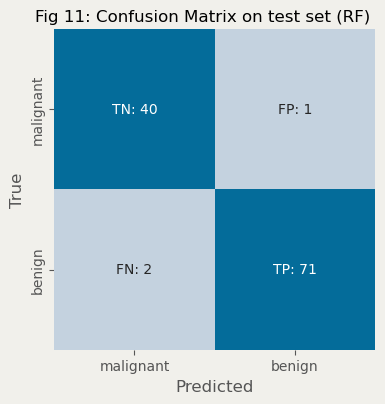

In [488]:
label_rf = cm_labels(conf_matrix_rf)
fig, ax= plt.subplots(figsize=(4, 4))
ax = sns.heatmap(conf_matrix_rf, annot=label_rf, fmt='',cmap=['#c4d2df','#046C9A'], cbar=False)
ax.xaxis.set_ticklabels(['malignant', 'benign'])
ax.yaxis.set_ticklabels(['malignant', 'benign'])

# for i, a in enumerate(ax.flat):
#     a.set_title(f'Model: LR {i+1}')
#     a.xaxis.tick_top()
#     a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Fig 11: Confusion Matrix on test set (RF)')
#plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 11.png', bbox_inches='tight')
plt.show()